In [ ]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import seaborn as sn
%matplotlib inline

In [ ]:
ds= pd.read_csv('convertcsv.csv', low_memory= False)
ds.head()

,uuid,scenario/category,scenario/uuid,scenario/post_id,scenario/kbs/0/personal/Bottomline,scenario/kbs/0/personal/Role,scenario/kbs/0/personal/Target,scenario/kbs/0/item/Category,scenario/kbs/0/item/Images/0,scenario/kbs/0/item/Price,scenario/kbs/0/item/Description/0,scenario/kbs/0/item/Title,scenario/kbs/1/personal/Bottomline,scenario/kbs/1/personal/Role,scenario/kbs/1/personal/Target,scenario/kbs/1/item/Category,scenario/kbs/1/item/Images/0,scenario/kbs/1/item/Price,scenario/kbs/1/item/Description/0,scenario/kbs/1/item/Title,scenario/attributes/0/entity,scenario/attributes/0/unique,scenario/attributes/0/value_type,scenario/attributes/0/multivalued,scenario/attributes/0/name,scenario/attributes/1/entity,scenario/attributes/1/unique,scenario/attributes/1/value_type,scenario/attributes/1/multivalued,scenario/attributes/1/name,scenario/attributes/2/entity,scenario/attributes/2/unique,scenario/attributes/2/value_type,scenario/attributes/2/multivalued,scenario/attributes/2/name,scenario/attributes/3/entity,scenario/attributes/3/unique,scenario/attributes/3/value_type,scenario/attributes/3/multivalued,scenario/attributes/3/name,...,events/41/agent,events/41/time,events/42/action,events/42/start_time,events/42/data,events/42/agent,events/42/time,events/43/action,events/43/start_time,events/43/data,events/43/agent,events/43/time,events/44/action,events/44/start_time,events/44/data,events/44/agent,events/44/time,events/45/action,events/45/start_time,events/45/data,events/45/agent,events/45/time,events/24/data/price,events/24/data/sides,events/19/data/price,events/19/data/sides,events/20/data/price,events/20/data/sides,events/22/data/price,events/22/data/sides,events/21/data/price,events/21/data/sides,events/27/data/price,events/27/data/sides,scenario/kbs/0/item/Description/16,scenario/kbs/0/item/Description/17,scenario/kbs/1/item/Description/32,scenario/kbs/1/item/Description/33,scenario/kbs/1/item/Description/34,scenario/kbs/1/item/Description/35
0,C_fe3d143826f44a8db1072188f5345e8a,phone,S_6Bcls3VtniHs9vXk,6149527852,NaN,buyer,7,phone,phone/6149527852_0.jpg,10,Charge two devices simultaneously on the go. T...,Verizon Car Charger with Dual Output Micro USB...,NaN,seller,10,phone,phone/6149527852_0.jpg,10,Charge two devices simultaneously on the go. T...,Verizon Car Charger with Dual Output Micro USB...,False,False,role,False,Role,False,False,price,False,Bottomline,False,False,price,False,Target,False,False,text,False,Title,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C_4566b2e6938a4a6a8e714e799d780e71,bike,S_KBCT5vA6znuh9TvV,6151236842,NaN,buyer,120,bike,bike/6151236842_0.jpg,200,Hey there cl I have a long board for sale pret...,Long board custom bilt from the board up,NaN,seller,200,bike,bike/6151236842_0.jpg,200,Hey there cl I have a long board for sale pret...,Long board custom bilt from the board up,False,False,role,False,Role,False,False,price,False,Bottomline,False,False,price,False,Target,False,False,text,False,Title,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C_f82ff19f74094889873c8acc58ee582f,housing,S_Jrg93XX4AYzY9IQ7,6131652108,NaN,buyer,1920,housing,NaN,3200,This is a single family house in an excellent ...,A 4 bedroom single family house for rent in ce...,NaN,seller,3200,housing,NaN,3200,This is a single family house in an excellent ...,A 4 bedroom single family house for rent in ce...,False,False,role,False,Role,False,False,price,False,Bottomline,False,False,price,False,Target,False,False,text,False,Title,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C_15d928e7d3db4380a9d6a9a5e83fcd09,furniture,S_BPTzvYVeri3mn93K,6131245434,NaN,buyer,444,furniture,furniture/613124

In [ ]:
# Remove all the columns not relevant
df_filtered_drop=ds.drop(["scenario/uuid", "scenario/post_id", "scenario/kbs/0/personal/Bottomline", "scenario/kbs/1/personal/Bottomline", "scenario/kbs/0/item/Category", "scenario/kbs/0/item/Images/0", "scenario/kbs/0/item/Description/0", "scenario/kbs/0/item/Title", "scenario/kbs/1/item/Category", "scenario/kbs/1/item/Images/0", "scenario/kbs/1/item/Description/0", "scenario/kbs/1/item/Title", "scenario_uuid", "agents/0", "agents/1", "outcome/offer/sides"], axis = 1, inplace = False)
print(df_filtered_drop.shape)

(5247, 384)


In [ ]:
# Remove all the columns not required using regex for events
df_filtered_drop = df_filtered_drop[df_filtered_drop.columns.drop(list(df_filtered_drop.filter(regex = "^events/.*/start_time$")))]
df_filtered_drop = df_filtered_drop[df_filtered_drop.columns.drop(list(df_filtered_drop.filter(regex = "^events/.*/time$")))]
df_filtered_drop = df_filtered_drop[df_filtered_drop.columns.drop(list(df_filtered_drop.filter(regex = "^events/.*/action$")))]

# Remove all the columns not required related to attributes
df_filtered_drop = df_filtered_drop[df_filtered_drop.columns.drop(list(df_filtered_drop.filter(regex = "^scenario/attributes/.*")))]
print(df_filtered_drop)


                                    uuid  ... scenario/kbs/1/item/Description/35
0     C_fe3d143826f44a8db1072188f5345e8a  ...                                NaN
1     C_4566b2e6938a4a6a8e714e799d780e71  ...                                NaN
2     C_f82ff19f74094889873c8acc58ee582f  ...                                NaN
3     C_15d928e7d3db4380a9d6a9a5e83fcd09  ...                                NaN
4     C_c4e882c43dd746ad994226df5cc24eb7  ...                                NaN
...                                  ...  ...                                ...
5242  C_74c4b8d02b43482886c3455666f7a337  ...                                NaN
5243  C_9787bae8d4df4ad8b0fe38efb127b514  ...                                NaN
5244  C_e16cf81527b6460f90fabbdffdf16d34  ...                                NaN
5245  C_0055bcaeb06440baac997569dafd603a  ...                                NaN
5246  C_82b4463df03d4d53b1b94e69559eca55  ...                                NaN

[5247 rows x 206 columns]


In [ ]:
df_filtered_drop = df_filtered_drop[df_filtered_drop.columns.drop(list(df_filtered_drop.filter(regex = "^events/.*/data/.*")))]
df_filtered_drop = df_filtered_drop[df_filtered_drop.columns.drop(list(df_filtered_drop.filter(regex = "^scenario/kbs/.*/item/Description/.*")))]
# print(df_filtered_drop)

#drop NA values
df_filtered_drop = df_filtered_drop.fillna(0)
#df_filtered_drop.head()

In [ ]:
# Cleaning and processing

#Remove different actions not required
df_filtered_drop = df_filtered_drop.replace(['offer','quit','accept','reject'],0)

#convert everything in lower case
df_filtered_drop = df_filtered_drop.apply(lambda x: x.astype(str).str.lower())

#Replace special characters with whitespace
df_filtered_drop=df_filtered_drop.replace("[@_!#$%^&*()<>?/|}{~:,]",'',regex=True)

df_filtered_drop.head()

,uuid,scenario/category,scenario/kbs/0/personal/Role,scenario/kbs/0/personal/Target,scenario/kbs/0/item/Price,scenario/kbs/1/personal/Role,scenario/kbs/1/personal/Target,scenario/kbs/1/item/Price,scenario/intersection,outcome/reward,outcome/offer/price,events/0/data,events/0/agent,events/1/data,events/1/agent,events/2/data,events/2/agent,events/3/data,events/3/agent,events/4/data,events/4/agent,events/5/data,events/5/agent,events/6/data,events/6/agent,events/7/agent,events/8/data,events/8/agent,events/7/data,events/9/data,events/9/agent,events/10/data,events/10/agent,events/11/agent,events/12/data,events/12/agent,outcome/offer,events/11/data,events/13/data,events/13/agent,...,events/26/data,events/26/agent,events/27/data,events/27/agent,events/28/data,events/28/agent,events/29/data,events/29/agent,events/30/data,events/30/agent,events/31/data,events/31/agent,events/32/data,events/32/agent,events/33/data,events/33/agent,events/34/data,events/34/agent,events/35/data,events/35/agent,events/36/data,events/36/agent,events/37/data,events/37/agent,events/38/data,events/38/agent,events/39/data,events/39/agent,events/40/data,events/40/agent,events/41/data,events/41/agent,events/42/data,events/42/agent,events/43/data,events/43/agent,events/44/data,events/44/agent,events/45/data,events/45/agent
0,cfe3d143826f44a8db1072188f5345e8a,phone,buyer,7,10,seller,10,10,0.6,1,7.0,hi not sure if the charger would work for my c...,0,it will work i have never seen a car without a...,1,still can i buy it for 5 i'm on a tight budge,0.0,i think the lowest i would want to go is 8.,1.0,how about 6 and i pick it up myself it'll save...,0.0,7 and we have a deal.,1.0,eh fine. 7.,0.0,0.0,0,1.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0
1,c4566b2e6938a4a6a8e714e799d780e71,bike,buyer,120,200,seller,200,200,1.0,1,145.0,hii am interested in your board,0,hi do you have any questions,1,do you know what wood it is made out of,0.0,i do not know specifically but the brand is a ...,1.0,the wheels seem nice on it but they could be a...,0.0,no that offer is too low. the board is pretty ...,1.0,if i picked it up at your location would you a...,0.0,1.0,i could do 145 if you can gurantee the paintin...,0.0,make it 150 and we got a deal.,deal,1.0,great,0.0,0.0,0,1.0,0.0,0,0,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0
2,cf82ff19f74094889873c8acc58ee582f,housing,buyer,1920,3200,seller,3200,3200,1.0,1,1900.0,i would love to buy,0,sure what's your price,1,im on a budget so i could do 1850,0.0,how about 1900 and i'll wave the deposit.,1.0,i will take it,0.0,great,1.0,0,1.0,0.0,0,1.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0
3,c15d928e7d3db4380a9d6a9a5e83fcd09,furniture,buyer,444,585,seller,585,585,0.6,0,0.0,hello,0,hi,1,how old is the couch,0.0,it is practically brand new,1.0,as you know the value goes down as soon as the...,0.0,well as i said it has nearly no wear and was i...,1.0,0,0.0,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0
4,cc4e882c43dd746ad994226df5cc24eb7,furniture,buyer,600,1000,seller,1000,1000,1.0,0,0.0,500,0,that is a lot lower then i am willing to sell ...,1,0,1.0,0,1.0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0


In [ ]:
# Combine all events/*/data columns to have the entire chat in one cell
str1= "events/"
str2= "/data"
df_filtered_drop["message"]=""
for i in range(46):
  res = str1 + str(i) + str2
  df_filtered_drop.get(res).replace('0','', inplace=True)
  df_filtered_drop.get(res).replace('0.0','', inplace=True)

  df_filtered_drop["message"]= df_filtered_drop["message"] + " "+ df_filtered_drop.get(res)

df_filtered_drop["message"]


0        hi not sure if the charger would work for my ...
1        hii am interested in your board hi do you hav...
2        i would love to buy  sure what's your price i...
3        hello hi how old is the couch it is practical...
4        500 that is a lot lower then i am willing to ...
                              ...                        
5242     hello i was interested in your 2011 fusion hy...
5243     hi there  i'm interested in the chair you hav...
5244     hello i am interested in the bike you are sel...
5245     hi there  i saw those lamps you have posted a...
5246     hi there. are you interested in the place yes...
Name: message, Length: 5247, dtype: object

In [ ]:
#Remove data and agent columns
df_filtered_drop = df_filtered_drop[df_filtered_drop.columns.drop(list(df_filtered_drop.filter(regex = "^events/.*/data$")))]
df_filtered_drop = df_filtered_drop[df_filtered_drop.columns.drop(list(df_filtered_drop.filter(regex = "^events/.*/agent$")))]
df_filtered_drop = df_filtered_drop[df_filtered_drop.columns.drop("outcome/offer")]

df_filtered_drop.head()

,uuid,scenario/category,scenario/kbs/0/personal/Role,scenario/kbs/0/personal/Target,scenario/kbs/0/item/Price,scenario/kbs/1/personal/Role,scenario/kbs/1/personal/Target,scenario/kbs/1/item/Price,scenario/intersection,outcome/reward,outcome/offer/price,message
0,cfe3d143826f44a8db1072188f5345e8a,phone,buyer,7,10,seller,10,10,0.6,1,7.0,hi not sure if the charger would work for my ...
1,c4566b2e6938a4a6a8e714e799d780e71,bike,buyer,120,200,seller,200,200,1.0,1,145.0,hii am interested in your board hi do you hav...
2,cf82ff19f74094889873c8acc58ee582f,housing,buyer,1920,3200,seller,3200,3200,1.0,1,1900.0,i would love to buy sure what's your price i...
3,c15d928e7d3db4380a9d6a9a5e83fcd09,furniture,buyer,444,585,seller,585,585,0.6,0,0.0,hello hi how old is the couch it is practical...
4,cc4e882c43dd746ad994226df5cc24eb7,furniture,buyer,600,1000,seller,1000,1000,1.0,0,0.0,500 that is a lot lower then i am willing to ...


In [ ]:
# Cleaning and processing

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df_filtered_drop['message'] = df_filtered_drop['message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_filtered_drop.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,uuid,scenario/category,scenario/kbs/0/personal/Role,scenario/kbs/0/personal/Target,scenario/kbs/0/item/Price,scenario/kbs/1/personal/Role,scenario/kbs/1/personal/Target,scenario/kbs/1/item/Price,scenario/intersection,outcome/reward,outcome/offer/price,message
0,cfe3d143826f44a8db1072188f5345e8a,phone,buyer,7,10,seller,10,10,0.6,1,7.0,hi sure charger would work car. sell 5 work ne...
1,c4566b2e6938a4a6a8e714e799d780e71,bike,buyer,120,200,seller,200,200,1.0,1,145.0,hii interested board hi questions know wood ma...
2,cf82ff19f74094889873c8acc58ee582f,housing,buyer,1920,3200,seller,3200,3200,1.0,1,1900.0,would love buy sure what's price im budget cou...
3,c15d928e7d3db4380a9d6a9a5e83fcd09,furniture,buyer,444,585,seller,585,585,0.6,0,0.0,hello hi old couch practically brand new know ...
4,cc4e882c43dd746ad994226df5cc24eb7,furniture,buyer,600,1000,seller,1000,1000,1.0,0,0.0,500 lot lower willing sell item for.


In [ ]:
# df_filtered_drop.to_csv('check.csv')

In [ ]:
# Split dataset in train set and test set (80% used for training, 20% for testing)

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
# Import modules for evaluation purposes
# Import libraries for predcton
from sklearn import metrics

#Extract only the message and reward columns from dataframe
data = df_filtered_drop[["message", "outcome/reward"]]
X_train, X_test, y_train, y_test = train_test_split(data["message"], data["outcome/reward"].values , test_size=0.20, random_state=0)
# Show the size of our datasets
print('X Train Size:',X_train.shape)
print('X Test Size:',X_test.shape)

# test1= pd.read_csv('test_old.csv')
# X_train= df_filtered_drop['message']
# X_test= test1['message']
# y_train= df_filtered_drop['outcome/reward'].astype(int)
# y_test= test1['outcome/reward'].astype(int)
# print('X Train Size:',X_train.shape)
# print('X Test Size:',X_test.shape)
# # y_test.dtype
# #y_train.dtype

X Train Size: (4197,)
X Test Size: (1050,)


In [ ]:
#tfidf

# try multiple ways of calculating features
# Create the numericalizer TFIDF for lowercase
tfidf = TfidfVectorizer(decode_error='ignore', lowercase = True, min_df=2)
# Numericalize the train dataset
train = tfidf.fit_transform(X_train.values.astype('U'))
# Numericalize the test dataset
test = tfidf.transform(X_test.values.astype('U'))

print('Train size: ',train.shape)
print('Test size: ',test.shape)

Train size:  (4197, 5036)
Test size:  (1050, 5036)


In [ ]:
# Create the confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc,f1_score

def plot_confusion_matrix(y_test, y_pred):
    ''' Plot the confusion matrix for the target labels and predictions '''
    cm = confusion_matrix(y_test, y_pred)

    # Create a dataframe with the confusion matrix values
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),
                  range(cm.shape[1]))
    #plt.figure(figsize = (10,7))
    # Plot the confussion matrix
    sn.set(font_scale=1.4) #for label size
    sn.heatmap(df_cm, annot=True,fmt='.0f',annot_kws={"size": 10})# font size
    plt.show()


In [ ]:
# NAIVE BAYES

# create the model, train it on the train dataset and print the scores
model = MultinomialNB()
model.fit(train, y_train)
print("train score:", model.score(train, y_train))
print("test score:", model.score(test, y_test))

train score: 0.7617345723135573
test score: 0.7466666666666667


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc,f1_score

# ROC Curve
# plot no skill
# Calculate the points in the ROC curve
def plot_roc_curve(y_test, y_pred):
    ''' Plot the ROC curve for the target labels and predictions'''
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc= auc(fpr,tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

              precision    recall  f1-score   support

           0    1.00000   0.00746   0.01481       268
           1    0.74618   1.00000   0.85464       782

    accuracy                        0.74667      1050
   macro avg    0.87309   0.50373   0.43473      1050
weighted avg    0.81097   0.74667   0.64029      1050



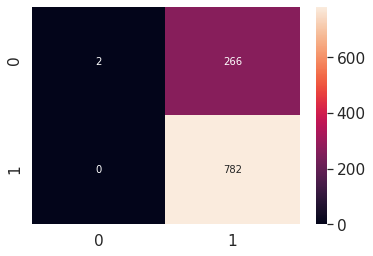

In [ ]:
# Predicting the Test set results for naive bayes
y_pred = model.predict(test)

print(metrics.classification_report(y_test, y_pred,  digits=5))
plot_confusion_matrix(y_test, y_pred)


In [ ]:
y_train.shape

(4197,)

In [ ]:
# SVM

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameters to tune
parameters = { 
    'C': [1.0, 10],
    'gamma': [1, 'auto', 'scale']
}
# Tune yyperparameters  using Grid Search and a SVM model
model = GridSearchCV(SVC(kernel='rbf'), parameters, cv=3, n_jobs=-1).fit(train, y_train)
print("train score:", model.score(train, y_train))
print("test score:", model.score(test, y_test))

train score: 0.9899928520371694
test score: 0.8361904761904762


              precision    recall  f1-score   support

           0    0.76667   0.51493   0.61607       268
           1    0.85057   0.94629   0.89588       782

    accuracy                        0.83619      1050
   macro avg    0.80862   0.73061   0.75598      1050
weighted avg    0.82916   0.83619   0.82447      1050



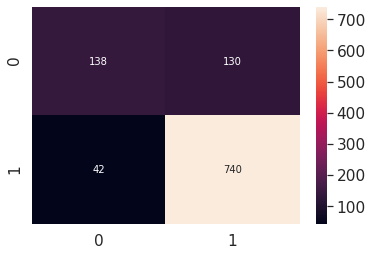

In [ ]:
# Predicting the Test set results for svm
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc,f1_score
y_pred = model.predict(test)

print(metrics.classification_report(y_test, y_pred,  digits=5))
plot_confusion_matrix(y_test, y_pred)


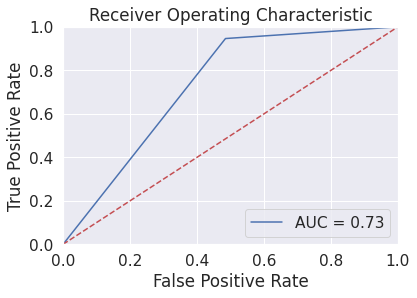

In [ ]:
plot_roc_curve(y_test.astype(int), y_pred.astype(int))

In [ ]:
y_pred

array(['0', '1', '1', ..., '0', '1', '1'], dtype=object)

In [ ]:
# DECISION TREE

from sklearn import tree
model= tree.DecisionTreeClassifier()
model.fit(train, y_train)
print("train score:", model.score(train, y_train))
print("test score:", model.score(test, y_test))

train score: 0.9899928520371694
test score: 0.7847619047619048


              precision    recall  f1-score   support

           0    0.57447   0.60448   0.58909       268
           1    0.86198   0.84655   0.85419       782

    accuracy                        0.78476      1050
   macro avg    0.71822   0.72551   0.72164      1050
weighted avg    0.78860   0.78476   0.78653      1050



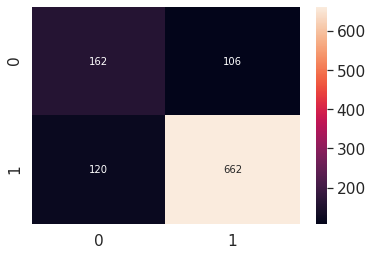

In [ ]:
# Predicting the Test set results for decision tree
y_pred = model.predict(test)

print(metrics.classification_report(y_test, y_pred,  digits=5))
plot_confusion_matrix(y_test, y_pred)

In [ ]:
# RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model.fit(train, y_train)
print("train score:", model.score(train, y_train))
print("test score:", model.score(test, y_test))


train score: 0.9899928520371694
test score: 0.8285714285714286


              precision    recall  f1-score   support

           0    0.78947   0.44776   0.57143       268
           1    0.83519   0.95908   0.89286       782

    accuracy                        0.82857      1050
   macro avg    0.81233   0.70342   0.73214      1050
weighted avg    0.82352   0.82857   0.81082      1050



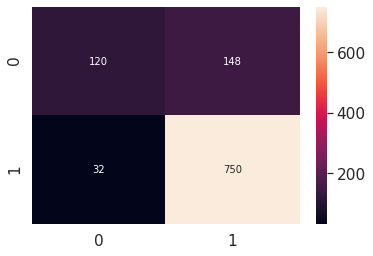

In [ ]:
# Predicting the Test set results for random forest
y_pred = model.predict(test)

print(metrics.classification_report(y_test, y_pred,  digits=5))
plot_confusion_matrix(y_test, y_pred)